### Task:  Geospatial Analysis
#### Task 3
* Visualize the locations of restaurants on a
 map using latitude and longitude
 information.

* Analyze the distribution of restaurants
 across different cities or countries.
 Determine if there is any correlation
 between the restaurant's location and its
 rating

In [ ]:
import pandas as pd
df = pd.read_csv("../Dataset .csv")

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
!pip install folium


   ---------------------------------------- 0/3 [xyzservices]
   ------------- -------------------------- 1/3 [branca]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]



In [ ]:
import folium
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=4)
 
for _, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],popup=row['Restaurant Name'], icon=folium.Icon(color='red', icon='cutlery', prefix='fa')).add_to(m)

m.save("restaurant_map.html")

In [ ]:
import webbrowser
webbrowser.open("restaurant_map.html")

True

In [26]:
## Distribution of restraunt across cities
import seaborn as sns
import matplotlib.pyplot as plt
data = df['City'].value_counts()


In [27]:
data = data.head(15)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Gurgaon'),
  Text(2, 0, 'Noida'),
  Text(3, 0, 'Faridabad'),
  Text(4, 0, 'Ghaziabad'),
  Text(5, 0, 'Bhubaneshwar'),
  Text(6, 0, 'Lucknow'),
  Text(7, 0, 'Ahmedabad'),
  Text(8, 0, 'Amritsar'),
  Text(9, 0, 'Guwahati'),
  Text(10, 0, 'Rio de Janeiro'),
  Text(11, 0, 'Bras�_lia'),
  Text(12, 0, 'Albany'),
  Text(13, 0, 'Doha'),
  Text(14, 0, 'Cape Town')])

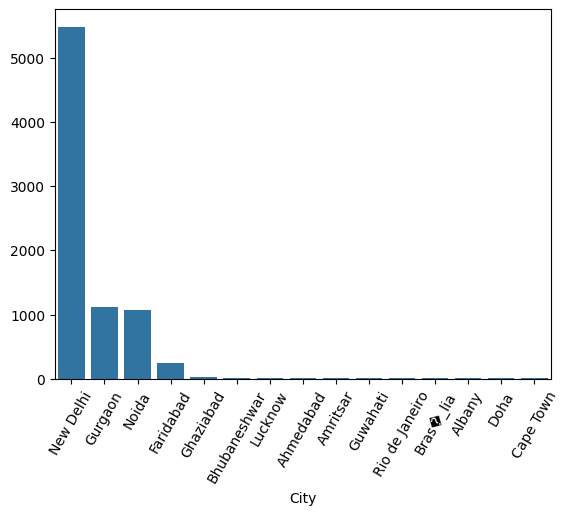

In [28]:
sns.barplot(x = data.index , y = data.values)
plt.xticks(rotation = 60)

<Axes: xlabel='Country Code', ylabel='count'>

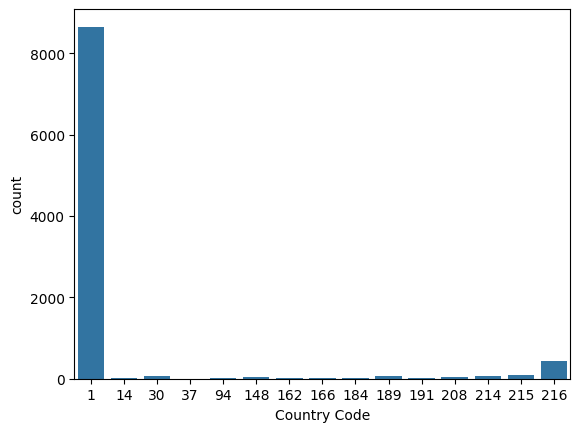

In [30]:
sns.countplot(df,x = df['Country Code'])

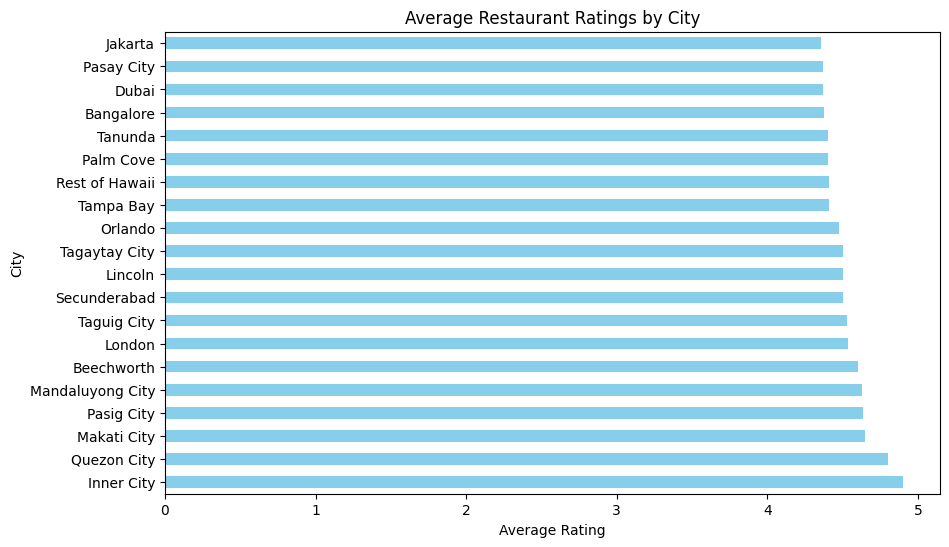

In [39]:
avg_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(20)
avg_ratings.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Average Restaurant Ratings by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()